In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [241]:
df = pd.read_csv('/home/jovyan/work/data/wine-reviews/winemag-data_first150k.csv', index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Text(0.5, 1.0, 'Variety distribution pie chart')

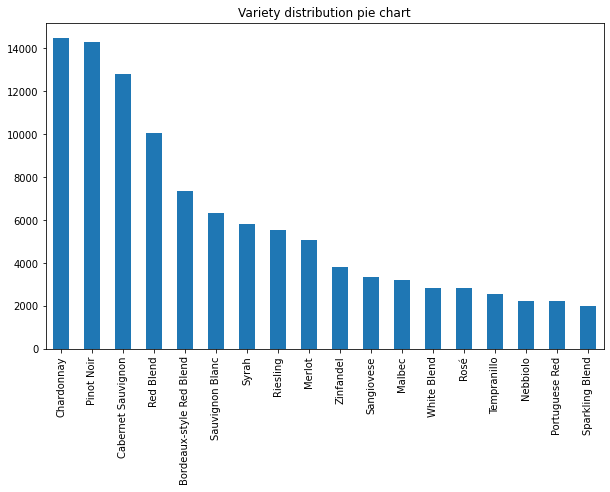

In [242]:
plot = df.variety.value_counts().head(18).plot.bar(figsize=(10, 6))
plot.set_title('Variety distribution pie chart')

Text(0.5, 1.0, 'Country repartition pie chart')

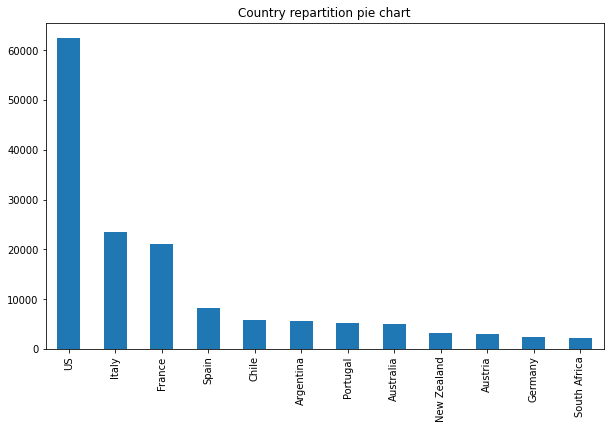

In [243]:
plot = df.country.value_counts().head(12).plot.bar(figsize=(10, 6))
plot.set_title('Country repartition pie chart')

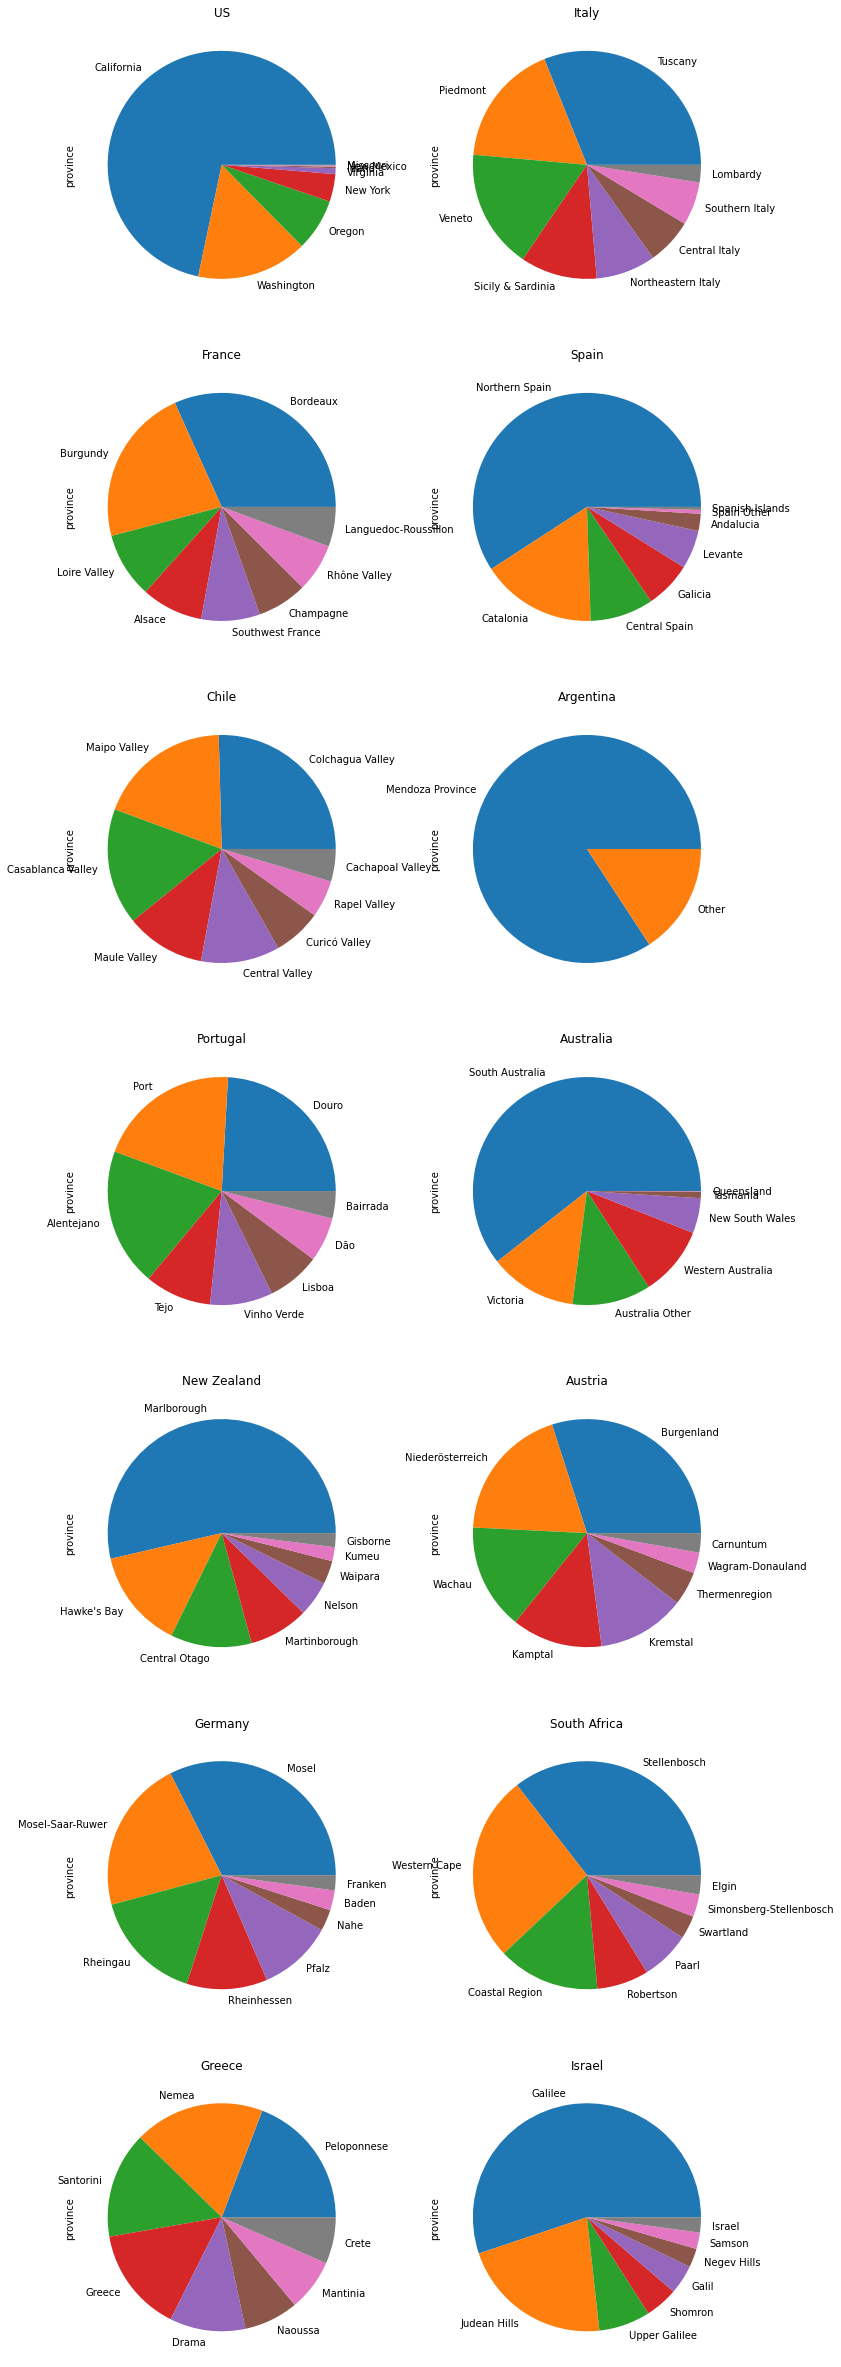

In [244]:
# getting unique value in country solumn
countries = df.country.unique()
countries = df.country.value_counts().head(14).keys().values


ncols = 2
nrows = len(countries) // ncols

df_list = [df[df.country == country] for country in countries]
fig, axes = plt.subplots(nrows, ncols)
count = 0
for r in range(nrows):
    for c in range(ncols):
        df_list[count].province.value_counts().head(8).plot.pie(ax=axes[r,c], figsize=(12, 8 + 5 * nrows)).set_title(countries[count])
        count = count + 1

<AxesSubplot:xlabel='points', ylabel='price'>

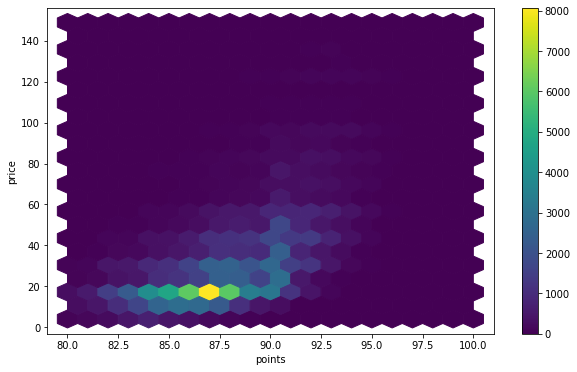

In [245]:
#df[df.price < 500].sample(500).plot.scatter(x='points', y='price', figsize=(10, 6))
# this gives a good idea of the density
df[df.price < 150].plot.hexbin(x='points', y='price', reduce_C_function=np.sum, cmap='viridis', figsize=(10, 6), gridsize=20, sharex=False)

chosing the right regression algo: https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5


In [278]:
main_variety = df.variety.value_counts().head(12).keys().values
main_variety

array(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Syrah', 'Riesling',
       'Merlot', 'Zinfandel', 'Sangiovese', 'Malbec'], dtype=object)

<AxesSubplot:xlabel='variety'>

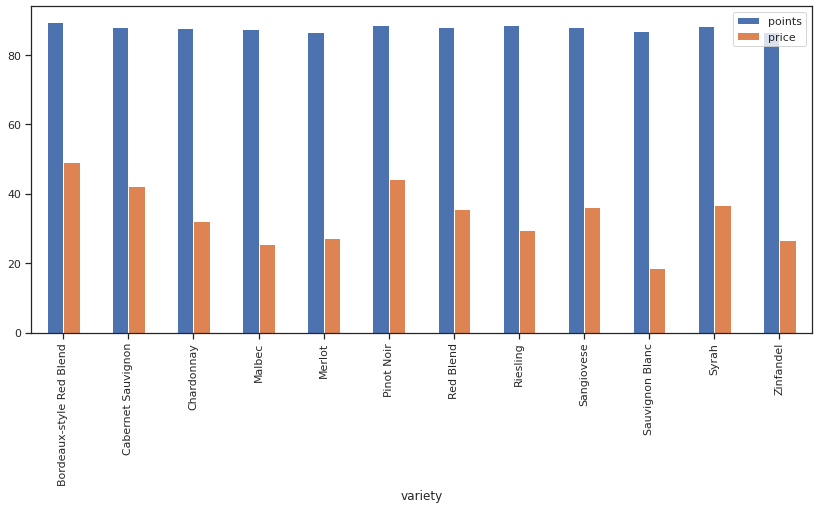

In [279]:
df_main_variety = df[df.variety.isin(main_variety)]
df_mean = df_main_variety.groupby('variety').mean()
df_mean.plot.bar(figsize=(14, 6))

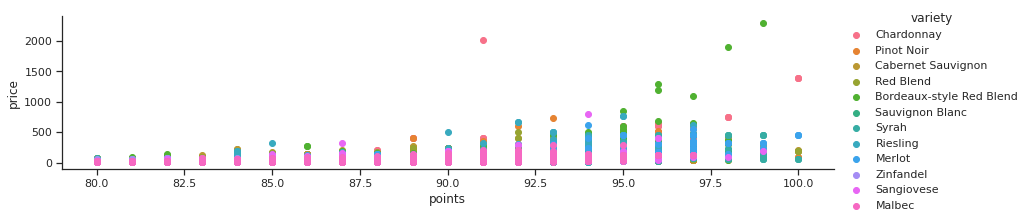

In [280]:
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=df_main_variety, hue='variety', hue_order=main_variety, aspect=4)
#fg = seaborn.FacetGrid(data=df_main_variety, hue='variety', hue_order=main_variety, aspect=1.61)
fg.map(pyplot.scatter, 'points', 'price').add_legend()


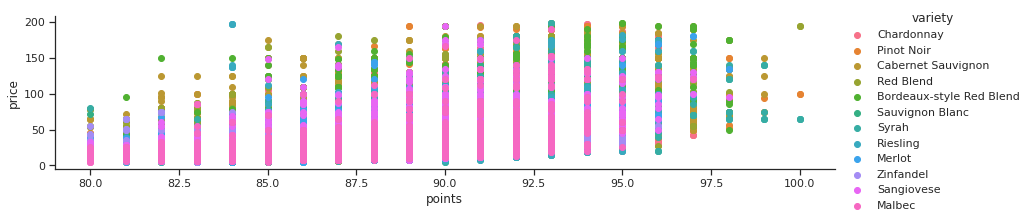

In [281]:
fg = seaborn.FacetGrid(data=df_main_variety[df_main_variety.price < 200], hue='variety', hue_order=main_variety, aspect=4)
fg.map(pyplot.scatter, 'points', 'price').add_legend()